<a href="https://colab.research.google.com/github/SwathiNagilla/Swathi_INFO5731_FALL2024/blob/main/Nagilla_swathi_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [7]:
import csv
import re
from collections import defaultdict

# Load the dataset
def read_data(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        abstracts = [row[1].lower() for row in reader if len(row) > 1]  # Convert to lowercase for uniformity
    return abstracts

# Tokenize text into words
def tokenize(text):
    return re.findall(r'\b\w+\b', text)

# Generate N-grams and count frequency (N=3 for trigrams)
def trigrams(abstracts):
    trigram_counts = defaultdict(int)
    for abstract in abstracts:
        tokens = tokenize(abstract)
        for i in range(len(tokens) - 2):
            trigram = (tokens[i], tokens[i+1], tokens[i+2])
            trigram_counts[trigram] += 1
    return trigram_counts

# Calculate bigram probabilities
def bigram_probabilities(abstracts):
    bigram_counts = defaultdict(int)
    unigram_counts = defaultdict(int)

    # Count bigrams and unigrams
    for abstract in abstracts:
        tokens = tokenize(abstract)
        if not tokens:
            continue
        for i in range(len(tokens) - 1):
            bigram = (tokens[i], tokens[i+1])
            bigram_counts[bigram] += 1
            unigram_counts[tokens[i]] += 1
        unigram_counts[tokens[-1]] += 1

    # Calculate probabilities
    bigram_probabilities = {}
    for (w1, w2), count in bigram_counts.items():
        bigram_probabilities[(w1, w2)] = count / unigram_counts[w1]

    return bigram_probabilities

# Extract noun phrases and calculate relative probabilities
def extract_noun_phrases(text):
    words = tokenize(text)
    noun_phrases = []
    current_phrase = []

    for word in words:
        if re.match(r'\b\w+ing\b|\b\w+ion\b|\b\w+ment\b|\b\w+s\b', word):
            current_phrase.append(word)
        else:
            if current_phrase:
                noun_phrases.append(" ".join(current_phrase))
                current_phrase = []
    if current_phrase:
        noun_phrases.append(" ".join(current_phrase))
    return noun_phrases

# Calculate relative probabilities of noun phrases for each review
def Cal_relative_probabilities(abstracts):
    noun_phrase_counts = defaultdict(int)
    abstract_phrases = []

    for abstract in abstracts:
        phrases = extract_noun_phrases(abstract)
        abstract_phrases.append(phrases)
        for phrase in phrases:
            noun_phrase_counts[phrase] += 1

    max_frequency = max(noun_phrase_counts.values())

    relative_probabilities = []
    for phrases in abstract_phrases:
        row_probabilities = {}
        for phrase in noun_phrase_counts.keys():
            frequency = phrases.count(phrase)
            row_probabilities[phrase] = frequency / max_frequency if max_frequency > 0 else 0
        relative_probabilities.append(row_probabilities)

    return relative_probabilities, list(noun_phrase_counts.keys())

# Save the trigram frequencies to a CSV file
def save_trigrams(trigrams, file_path='trigram_frequencies.csv'):
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Trigram', 'Frequency'])
        for trigram, count in trigrams.items():
            writer.writerow([' '.join(trigram), count])

# Save the bigram probabilities to a CSV file
def save_bigram_probabilities(bigram_probs, file_path='bigram_probabilities.csv'):
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Bigram', 'Probability'])
        for bigram, prob in bigram_probs.items():
            writer.writerow([' '.join(bigram), prob])

# Save the noun phrase relative probabilities to a CSV file
def save_relative_probabilities(relative_probs, noun_phrases, file_path='relative_probabilities.csv'):
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Review'] + noun_phrases)
        for i, row in enumerate(relative_probs):
            writer.writerow([f'Review {i+1}'] + [row.get(phrase, 0) for phrase in noun_phrases])

# Main processing
file_path = 'cleaned_data_science_abstracts.csv'
abstracts = read_data(file_path)

# Task (1): Trigram frequency
trigram_counts = trigrams(abstracts)
save_trigrams(trigram_counts)

# Task (2): Bigram probabilities
bigram_probs = bigram_probabilities(abstracts)
save_bigram_probabilities(bigram_probs)

# Task (3): Relative probabilities for noun phrases
relative_probs, noun_phrases = Cal_relative_probabilities(abstracts)
save_relative_probabilities(relative_probs, noun_phrases)


Trigram frequency:https://myunt-my.sharepoint.com/:x:/g/personal/swathinagilla_my_unt_edu/EeQsHDp4fe1OmHT15h_-NwEBbI3NMJ8YHobkr1Wfx8goyQ?e=b5mcmx


---
Bigram Probabilities: https://myunt-my.sharepoint.com/:x:/g/personal/swathinagilla_my_unt_edu/EdyIZ_NqtRNJlH1ZU9pIGJgBrdMXuFflphOHlAu0l8sEOw?e=1MBEMz

---
Relative probabilities: https://myunt-my.sharepoint.com/:x:/g/personal/swathinagilla_my_unt_edu/EejUPDVUnbxFoCJZvk1YvAgBBESCaWOXp3vNO090iplvsg?e=ocFxmk



## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:

# Write your code here
import csv
import re
import math
from collections import defaultdict, Counter

# Load the dataset
def data(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        documents = [row[1].lower() for row in reader if len(row) > 1]
    return documents

# Tokenize
def tokenize(text):
    return re.findall(r'\b\w+\b', text)

# Build term frequency (TF)
def tf(documents):
    tf_matrix = []
    for document in documents:
        tokens = tokenize(document)
        term_counts = Counter(tokens)
        doc_tf = {term: count / len(tokens) for term, count in term_counts.items()}
        tf_matrix.append(doc_tf)
    return tf_matrix

# Calculate inverse document frequency (IDF)
def idf(documents):
    idf_values = {}
    total_docs = len(documents)
    term_doc_count = defaultdict(int)

    for document in documents:
        tokens = set(tokenize(document))
        for token in tokens:
            term_doc_count[token] += 1

    for term, doc_count in term_doc_count.items():
        idf_values[term] = math.log(total_docs / (1 + doc_count))

    return idf_values

# Build TF-IDF matrix
def build_tfidf_matrix(tf_matrix, idf_values):
    tfidf_matrix = []
    for doc_tf in tf_matrix:
        doc_tfidf = {term: tf * idf_values[term] for term, tf in doc_tf.items()}
        tfidf_matrix.append(doc_tfidf)
    return tfidf_matrix

# Calculate cosine similarity between query vector and document vector
def cosine_similarity(doc_vector, query_vector):
    dot_product = sum(doc_vector[term] * query_vector.get(term, 0) for term in doc_vector)
    doc_magnitude = math.sqrt(sum(weight ** 2 for weight in doc_vector.values()))
    query_magnitude = math.sqrt(sum(weight ** 2 for weight in query_vector.values()))

    if doc_magnitude == 0 or query_magnitude == 0:
        return 0.0

    return dot_product / (doc_magnitude * query_magnitude)

# Create a TF-IDF vector for a query
def build_query_vector(query, idf_values):
    tokens = tokenize(query)
    term_counts = Counter(tokens)
    query_tf = {term: count / len(tokens) for term, count in term_counts.items()}
    query_tfidf = {term: query_tf[term] * idf_values.get(term, 0) for term in query_tf}
    return query_tfidf

# Rank documents based on cosine similarity with the query
def rank(tfidf_matrix, query_vector):
    similarities = []
    for i, doc_vector in enumerate(tfidf_matrix):
        similarity = cosine_similarity(doc_vector, query_vector)
        similarities.append((i + 1, similarity))

    ranked_documents = sorted(similarities, key=lambda x: x[1], reverse=True)
    return ranked_documents

# Main program execution
file_path = 'cleaned_data_science_abstracts.csv'
documents = data(file_path)

# Calculate TF and IDF values
tf_matrix = tf(documents)
idf_values = idf(documents)

# Build TF-IDF matrix
tfidf_matrix = build_tfidf_matrix(tf_matrix, idf_values)

# Define a query and build its TF-IDF vector
query = "Innovative approaches in data analysis and machine learning for predictive modeling"
query_vector = build_query_vector(query, idf_values)

# Rank documents based on cosine similarity with the query
ranked_documents = rank(tfidf_matrix, query_vector)

# Display ranked documents with similarity scores
print("Ranked Documents based on Query:")
for doc_id, similarity in ranked_documents:
    print(f"Document {doc_id}: Cosine Similarity = {similarity:.4f}")

Ranked Documents based on Query:
Document 765: Cosine Similarity = 0.2344
Document 192: Cosine Similarity = 0.2292
Document 594: Cosine Similarity = 0.2267
Document 990: Cosine Similarity = 0.1988
Document 828: Cosine Similarity = 0.1865
Document 117: Cosine Similarity = 0.1833
Document 323: Cosine Similarity = 0.1790
Document 576: Cosine Similarity = 0.1753
Document 275: Cosine Similarity = 0.1708
Document 114: Cosine Similarity = 0.1636
Document 187: Cosine Similarity = 0.1578
Document 113: Cosine Similarity = 0.1556
Document 19: Cosine Similarity = 0.1545
Document 206: Cosine Similarity = 0.1531
Document 153: Cosine Similarity = 0.1352
Document 588: Cosine Similarity = 0.1302
Document 342: Cosine Similarity = 0.1224
Document 181: Cosine Similarity = 0.1194
Document 23: Cosine Similarity = 0.1164
Document 545: Cosine Similarity = 0.1158
Document 352: Cosine Similarity = 0.1149
Document 642: Cosine Similarity = 0.1149
Document 596: Cosine Similarity = 0.1138
Document 405: Cosine Simil

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Word2Vec model trained and saved.


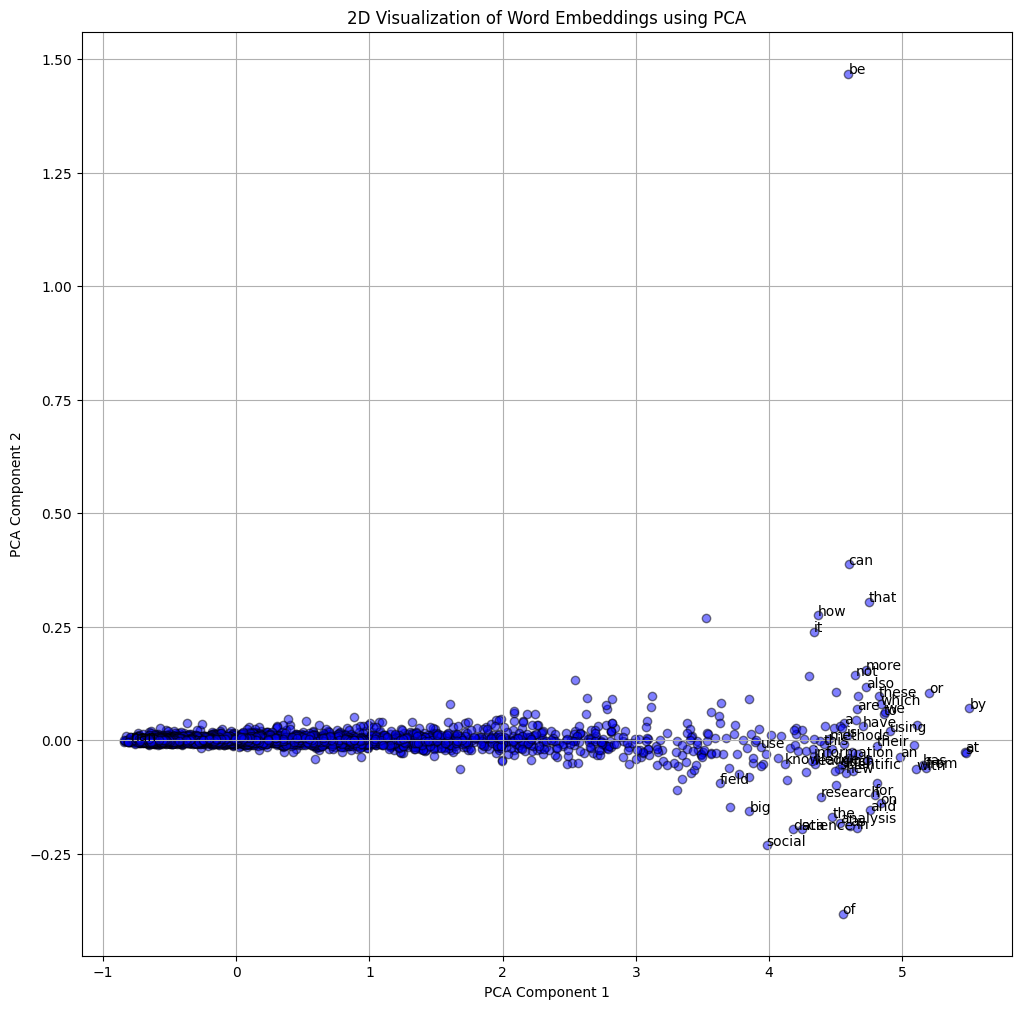

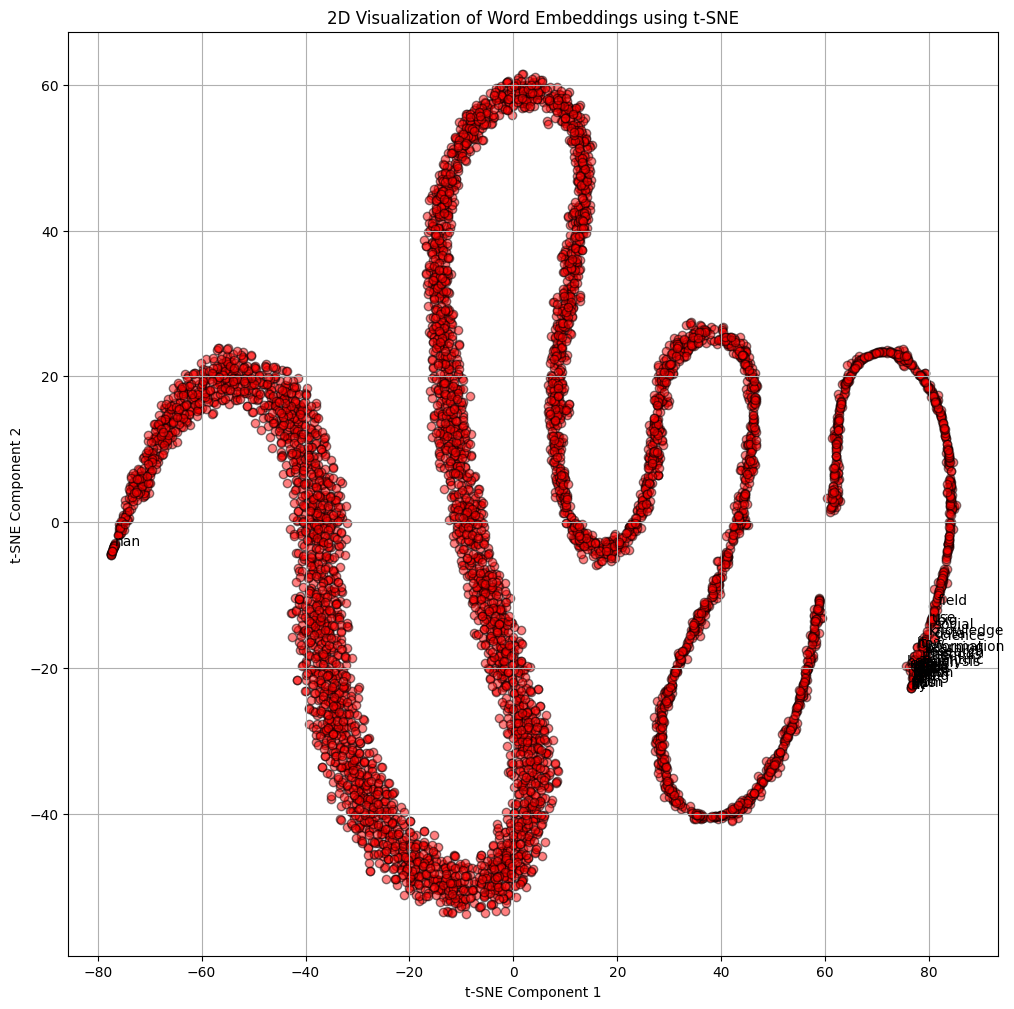

In [ ]:
import csv
import re
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 1: Load the dataset
def data(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        next(reader)
        documents = [row[1].lower() for row in reader if len(row) > 1]
    return documents

# Step 2: Tokenize each document into words
def preprocess_documents(documents):
    tokenized_documents = []
    for document in documents:
        tokens = re.findall(r'\b\w+\b', document)
        tokenized_documents.append(tokens)
    return tokenized_documents

# Step 3: Train a Word2Vec model with 300 dimensions
def word2vec_model(tokenized_documents):
    embedding_dim = 300
    model = Word2Vec(sentences=tokenized_documents, vector_size=embedding_dim, window=5, min_count=2, workers=4)
    model.save("word2vec.model")
    print("Word2Vec model trained and saved.")
    return model

# Step 4: Visualize word embeddings using PCA
def visualize_pca(model):
    words = list(model.wv.key_to_index)
    word_vectors = model.wv[words]

    # Reduce dimensions to 2D using PCA
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)

    # Plot the words
    plt.figure(figsize=(12, 12))
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o', color='blue', edgecolor='k', alpha=0.5)

    for i, word in enumerate(words[:50]):
        plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))

    plt.title("2D Visualization of Word Embeddings using PCA")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.grid(True)
    plt.show()

# Step 5: Visualize word embeddings using t-SNE
def visualize_tsne(model):
    words = list(model.wv.key_to_index)
    word_vectors = model.wv[words]

    # Reduce dimensions to 2D using t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    word_vectors_2d_tsne = tsne.fit_transform(word_vectors)

    # Plot the words
    plt.figure(figsize=(12, 12))
    plt.scatter(word_vectors_2d_tsne[:, 0], word_vectors_2d_tsne[:, 1], marker='o', color='red', edgecolor='k', alpha=0.5)

    for i, word in enumerate(words[:50]):
        plt.annotate(word, (word_vectors_2d_tsne[i, 0], word_vectors_2d_tsne[i, 1]))

    plt.title("2D Visualization of Word Embeddings using t-SNE")
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.grid(True)
    plt.show()

# Main Program Execution
file_path = 'cleaned_data_science_abstracts.csv'

# Load and preprocess data
documents = data(file_path)
tokenized_documents = preprocess_documents(documents)

# Train the Word2Vec model
model = word2vec_model(tokenized_documents)

# Visualize embeddings
visualize_pca(model)
visualize_tsne(model)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/SwathiNagilla/Swathi_INFO5731_FALL2024/blob/main/Final_data.pdf


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
This assignment was both tough and gratifying. Handling sentiment analysis without libraries necessitated considerable innovation, particularly in defining sentiment. The most enjoyable part was progressing through the process from data cleaning to visualization, and seeing the annotated data ready for analysis was rewarding. Overall, the time frame felt reasonable, and this project helped me improve my text processing skills.